In [8]:
import py_vollib_vectorized
import numpy as np

import pandas as pd

log_path="/home/jianj0c/project/STP/notebook_V/Log/86.Pricing"


call_prices=pd.read_csv(f"{log_path}/calls_records_with_theoretical_price.csv")
put_prices=pd.read_csv(f"{log_path}/put_records_with_theoretical_price.csv")


In [9]:


F=3540.54678899083
r=0.02
t=21/252
flag='c'

# call
theoratical_price=np.array(call_prices["theoretical_price"])
market_price=np.array(call_prices["price"])


K=call_prices["strike"]

implied_vol_by_our=py_vollib_vectorized.vectorized_implied_volatility_black(theoratical_price, F, K, r, t, flag, return_as='numpy')


implied_vol_by_market=py_vollib_vectorized.vectorized_implied_volatility_black(market_price, F, K, r, t, flag, return_as='numpy')

call_prices["implied_vol_by_our"]=implied_vol_by_our
call_prices["implied_vol_by_market"]=implied_vol_by_market

#put

theoratical_price=np.array(put_prices["theoretical_price"])
market_price=np.array(put_prices["price"])


K=put_prices["strike"]

flag='p'
implied_vol_by_our=py_vollib_vectorized.vectorized_implied_volatility_black(theoratical_price, F, K, r, t, flag, return_as='numpy')


implied_vol_by_market=py_vollib_vectorized.vectorized_implied_volatility_black(market_price, F, K, r, t, flag, return_as='numpy')

put_prices["implied_vol_by_our"]=implied_vol_by_our
put_prices["implied_vol_by_market"]=implied_vol_by_market




/home/jianj0c/anaconda3/envs/py3-env/lib/python3.7/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [17, 18, 19]
  below_intrinsic, above_max_price = _check_below_and_above_intrinsic(K, F, flag, undiscounted_option_price, on_error)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格


def plot_combined_volatility_smiles(put_prices, call_prices, current_price, 
                                    put_label="Put Options", call_label="Call Options"):
    # 创建画布
    plt.figure(figsize=(12, 7))
    
    # 绘制看跌期权波动率
    if 'implied_vol_by_our' in put_prices.columns:
        plt.scatter(put_prices['strike'], put_prices['implied_vol_by_our'], 
                   label=f'{put_label} (Our Calculation)', alpha=0.7, s=80, marker='o', color='blue')
        plt.plot(put_prices['strike'], put_prices['implied_vol_by_our'], alpha=0.5, color='blue')
    
    if 'implied_vol_by_market' in put_prices.columns:
        plt.scatter(put_prices['strike'], put_prices['implied_vol_by_market'], 
                   label=f'{put_label} (Market)', alpha=0.7, s=80, marker='s', color='blue', edgecolors='black')
    
    # 绘制看涨期权波动率
    if 'implied_vol_by_our' in call_prices.columns:
        plt.scatter(call_prices['strike'], call_prices['implied_vol_by_our'], 
                   label=f'{call_label} (Our Calculation)', alpha=0.7, s=80, marker='o', color='orange')
        plt.plot(call_prices['strike'], call_prices['implied_vol_by_our'], alpha=0.5, color='orange')
    
    if 'implied_vol_by_market' in call_prices.columns:
        plt.scatter(call_prices['strike'], call_prices['implied_vol_by_market'], 
                   label=f'{call_label} (Market)', alpha=0.7, s=80, marker='s', color='orange', edgecolors='black')
    
    # 添加当前市场价格的纵线
    plt.axvline(x=current_price, color='red', linestyle='--', 
               label=f'Current Price: {current_price:.2f}')
    
    # 添加标题和标签
    plt.title('Volatility Smile Comparison: Put vs Call Options', fontsize=16, fontweight='bold')
    plt.xlabel('Strike Price', fontsize=14)
    plt.ylabel('Implied Volatility', fontsize=14)
    
    # 添加网格和图例
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, loc='best')
    
    # 调整布局
    plt.tight_layout()
    
    # 显示图形
    plt.show()

# 调用函数示例
# plot_combined_volatility_smiles(put_prices, call_prices, F)


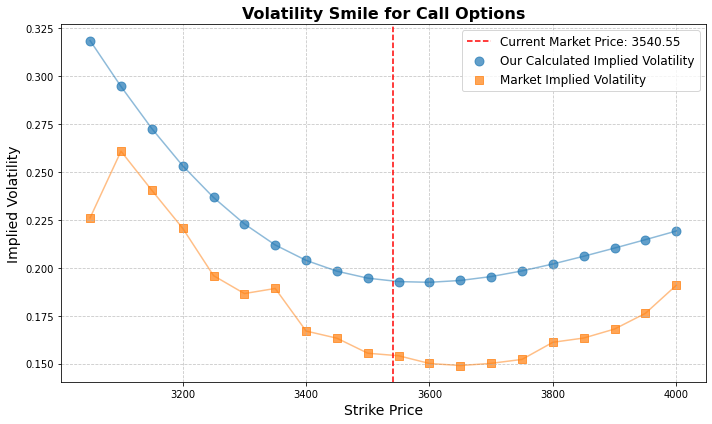

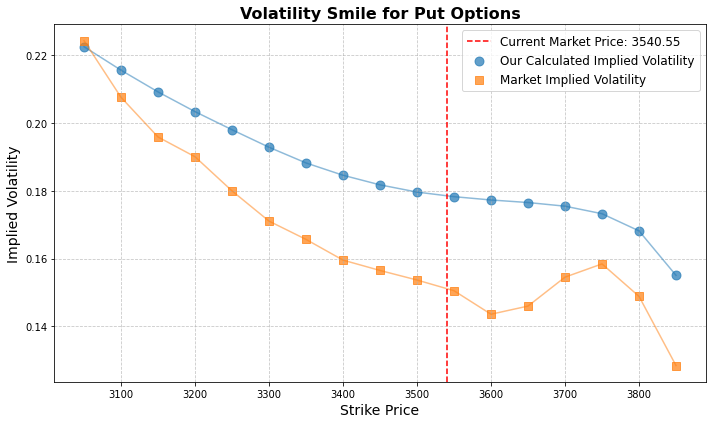

In [19]:
plot_volatility_smile(call_prices,F,"Call")
plot_volatility_smile(put_prices,F,"Put")

In [6]:

import matplotlib.pyplot as plt



In [7]:
dir(py_vollib_vectorized)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_iv_models',
 '_model_calls',
 '_numerical_greeks',
 'api',
 'get_all_greeks',
 'greeks',
 'implied_volatility',
 'inspect',
 'models',
 'partial',
 'price_dataframe',
 'py_vollib',
 'repr_partial',
 'update_wrapper',
 'util',
 'vectorized_black',
 'vectorized_black_scholes',
 'vectorized_black_scholes_merton',
 'vectorized_delta',
 'vectorized_gamma',
 'vectorized_implied_volatility',
 'vectorized_implied_volatility_black',
 'vectorized_rho',
 'vectorized_theta',
 'vectorized_vega']